# ***QUESTION 1 (Bagging)***

---

---




In [93]:
pip install -U scikit-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ***Task 1***

*Create a dataset with 1000 samples, using the **‘make_moon’s** function of sklearn (choose random_state=42, noise=0.3). Perform appropriate preprocessing, train and test split of the dataset. Plot the generated dataset.*

In [94]:
from sklearn.datasets import make_moons

In [95]:
data_x, data_y = make_moons(n_samples=1000, shuffle=True, noise=0.3, random_state=42)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


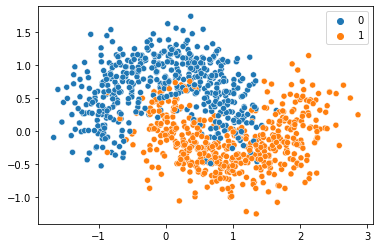

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data_x[:,0], data_x[:,1], hue=data_y)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split as split

x_train, x_test, y_train, y_test = split(data_x, data_y, train_size = 0.8)

***Decision Tree***

In [98]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree

In [99]:
classifier = DTC(max_depth=2)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

Max Depth...


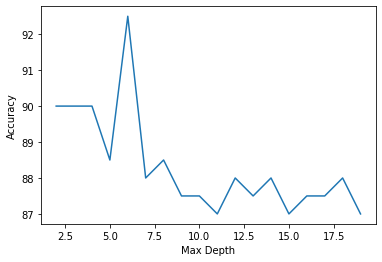

The best value of hyperparameter max_depth is : 6


In [100]:
min_dic = {}
for i in range(2, 20):
    classifier = DTC(max_depth=i)
    classifier.fit(x_train, y_train)

    min_dic[i] = classifier.score(x_test, y_test)*100

print("Max Depth...")

x = list(min_dic.keys())
y = list(min_dic.values())
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")

plt.plot(x, y)
plt.show()

print("The best value of hyperparameter max_depth is :", max(min_dic, key=min_dic.get))

In [138]:
classifier = DTC(max_depth=6)
classifier.fit(x_train, y_train)

print("The accuracy of decision tree is :", classifier.score(x_test, y_test)*100)

The accuracy of decision tree is : 92.5


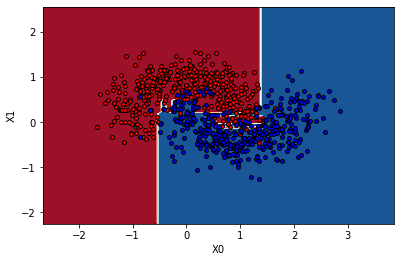

In [102]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

classes = [0, 1]

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

***Bagging Classifier***

In [103]:
from sklearn.ensemble import BaggingClassifier as BagCls

In [104]:
classifier2 = BagCls(estimator = DTC(), n_estimators=10, random_state=0).fit(x_train, y_train)
print("Accuracy of Bagging Classifier is :", classifier2.score(x_test, y_test)*100, "%")

Accuracy of Bagging Classifier is : 90.5 %


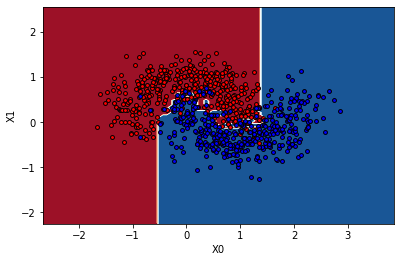

In [105]:
ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    classifier2,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

***Random Forest***

In [106]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(max_depth=6, random_state=1)
clf3.fit(x_train, y_train)

print("Accuracy of Bagging Classifier is :", clf3.score(x_test, y_test)*100, "%")

Accuracy of Bagging Classifier is : 92.0 %


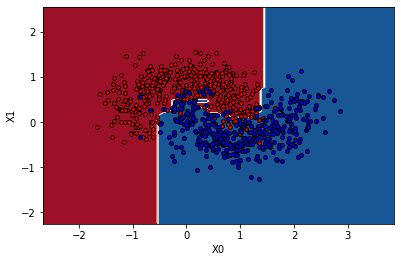

In [107]:
ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf3,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

***Estimator tuning***

Varying number of estimators...


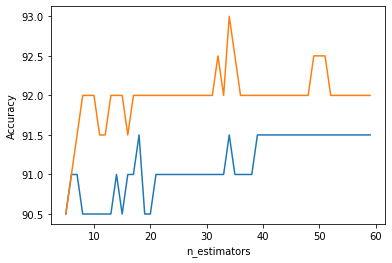

Max accuracy for Bagging Classifier obtained at n_estimators : 18
Max accuracy for Random Forest Classifier obtained at n_estimators : 34


In [108]:
min_dic_bag = {}
min_dic_rf = {}

print("Varying number of estimators...")
for i in range (5, 60):
    classifier2 = BagCls(estimator = DTC(max_depth=6), n_estimators=i, random_state=0).fit(x_train, y_train)
    min_dic_bag[i] = classifier2.score(x_test, y_test)*100

    clf3 = RandomForestClassifier(max_depth=6, n_estimators = i, random_state=1).fit(x_train, y_train)
    min_dic_rf[i] = clf3.score(x_test, y_test)*100

x = list(min_dic_bag.keys())
y_rf = list(min_dic_rf.values())
y_bag = list(min_dic_bag.values())

plt.ylabel("Accuracy")
plt.xlabel("n_estimators")

plt.plot(x, y_bag)
plt.plot(x, y_rf)
plt.show()

print("Max accuracy for Bagging Classifier obtained at n_estimators :", max(min_dic_bag, key=min_dic_bag.get))
print("Max accuracy for Random Forest Classifier obtained at n_estimators :", max(min_dic_rf, key=min_dic_rf.get))

In [109]:
clf_bag = BagCls(estimator = DTC(max_depth=6), n_estimators=16, random_state=0).fit(x_train, y_train)
print("Accuracy of Bagging Classifier :", clf_bag.score(x_test, y_test)*100)

clf_rf = RandomForestClassifier(max_depth=6, n_estimators=17, random_state=1).fit(x_train, y_train)
print("Accuracy of Random Forest Classifier :", clf_rf.score(x_test, y_test)*100)

Accuracy of Bagging Classifier : 91.0
Accuracy of Random Forest Classifier : 92.0


Bagging Classifier...


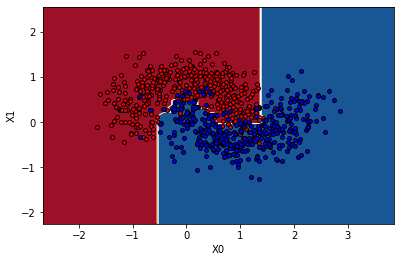

In [110]:
print("Bagging Classifier...")

ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf_bag,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

Random Forest Classifier...


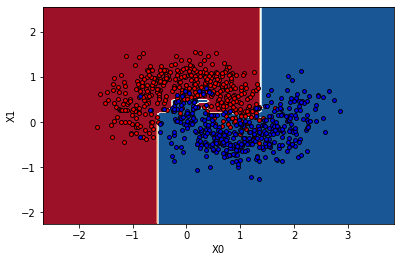

In [111]:
print("Random Forest Classifier...")

ax = plt.subplot()

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf_rf,
    x_train,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

### ***Task 2***

In [112]:
import random
import numpy as np

class Bagging_Classifier():
    def __init__(self, n_estimators=10, max_depth=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.classifiers = []

        self.x_train = None
        self.y_train = None

    def __data_generator(self, x, y):
        data_size = len(x)
        data = {}
        for i in range(self.n_estimators):
            x_clf = []
            y_clf = []

            for j in range(data_size):
                idx = random.randint(0, data_size-1)
                x_clf.append(x[idx])
                y_clf.append(y[idx])

            x_clf = np.array(x_clf)
            y_clf = np.array(y_clf)
            data[i] = [x_clf, y_clf]

        return data

    def __predictor(self, x_pred):
        predictions = []

        for i in self.classifiers:
            predictions.append(i.predict([x_pred])[0])

        return max(predictions,key=predictions.count)

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

        train_data = self.__data_generator(x, y)
        classifiers = []

        for i in range(self.n_estimators):
            x_train = train_data[i][0]
            y_train = train_data[i][1]

            clf = DTC(max_depth=self.max_depth)
            clf.fit(x_train, y_train)

            classifiers.append(clf)

        self.classifiers = classifiers

    def predict(self, x_test):
        y_pred = []

        for i in x_test:
            y_pred.append(self.__predictor(i))

        y_pred = np.array(y_pred)

        return y_pred

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)

        correct = 0

        for i in range(len(y_test)):
            if y_test[i]==y_pred[i]:
                correct += 1
        
        accuracy = correct/len(y_test)

        return accuracy

    def acc_individual(self, x_test, y_test):
        acc_ind = []

        for i in self.classifiers:
            acc_ind.append(i.score(x_test, y_test))

        return acc_ind

    def individual_decbound(self):
        classes = np.unique(self.y_train)

        # Parameters
        n_classes = len(classes)
        plot_colors = "rb"
        plot_step = 0.02

        

        for i in range(self.n_estimators):
            ax = plt.subplot()

            DecisionBoundaryDisplay.from_estimator(
                self.classifiers[i],
                self.x_train,
                cmap=plt.cm.RdBu,
                response_method="predict",
                ax=ax,
                xlabel='X0',
                ylabel='X1')

            # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                idx = np.where(y_train == classes[i])
                plt.scatter(
                    x_train[idx, 0],
                    x_train[idx, 1],
                    c=color,
                    cmap=plt.cm.RdYlBu,
                    edgecolor="black",
                    s=15,
                )

            plt.show()

In [113]:
clf_self = Bagging_Classifier(n_estimators=10)
clf_self.fit(x_train, y_train)

In [114]:
print("Accuracy of Bagging Classifier class is :", clf_self.score(x_test, y_test)*100, "%")

Accuracy of Bagging Classifier class is : 90.5 %


In [115]:
print("Individual accuracies of the trees are :")
clf_self.acc_individual(x_test, y_test)

Individual accuracies of the trees are :


[0.9, 0.905, 0.89, 0.895, 0.9, 0.92, 0.905, 0.895, 0.895, 0.895]

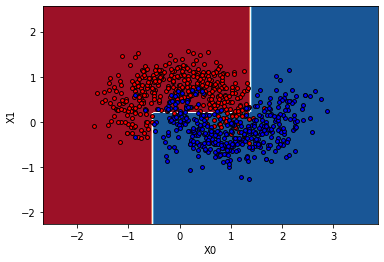

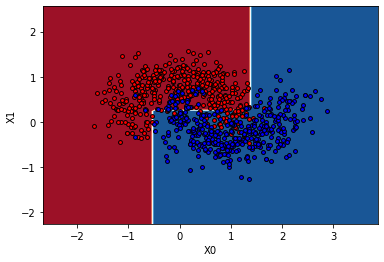

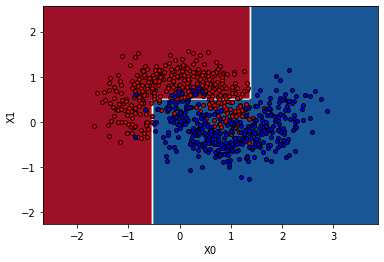

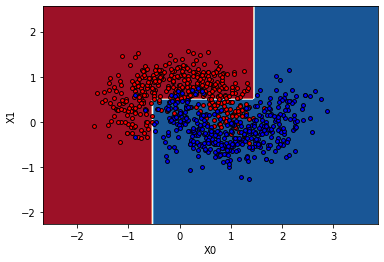

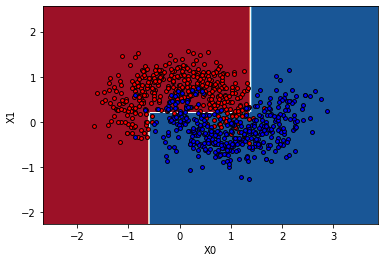

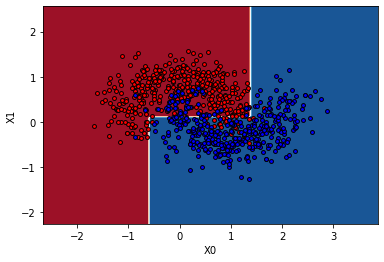

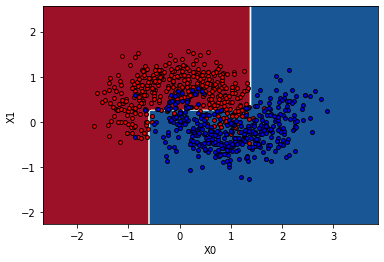

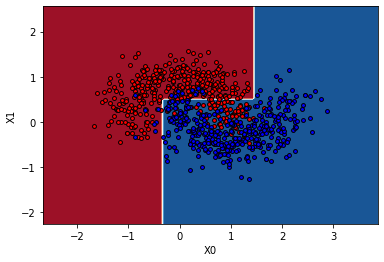

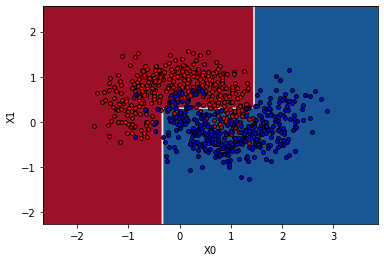

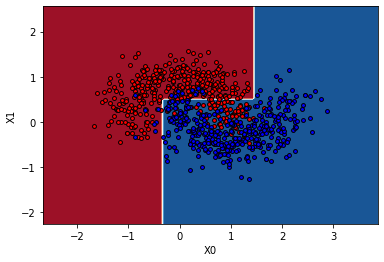

In [116]:
clf_self.individual_decbound()

# ***QUESTION 2 (Boosting)***

---
---

*Using the same dataset as in question 1.*

In [117]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The above requirements were already met.

In [119]:
x_train2, x_test2, y_train2, y_test2 = x_train, x_test, y_train, y_test 

### ***1. Train a AdaBoost Model.***

In [120]:
from sklearn.ensemble import AdaBoostClassifier

# keeping the default settings of the Classifier i.e., n_estimators=50, learning_rate=1 and random state=False
ada_clf = AdaBoostClassifier()

ada_clf.fit(x_train2, y_train2)

print("The accuracy of AdaBoost Classifier is :", ada_clf.score(x_test2, y_test2)*100)

The accuracy of AdaBoost Classifier is : 88.5


### ***2. Train a XGBoost Model in which subsample=0.7.***

In [141]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(subsample=0.7)
xg_clf.fit(x_train2, y_train2)

XGBClassifier(subsample=0.7)

### ***3. Print the accuracy on the training set and test set.***

In [142]:
print("Accuracy of XG Boost Classifier on...")

print("Train set is :", xg_clf.score(x_train2, y_train2)*100)
print("Test set is :", xg_clf.score(x_test2, y_test2)*100)

Accuracy of XG Boost Classifier on...
Train set is : 93.625
Test set is : 91.0


Confusion matrix on the test set is...


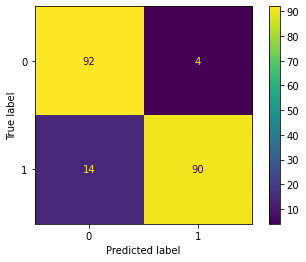

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = xg_clf.predict(x_test2)

print("Confusion matrix on the test set is...")
cm = confusion_matrix(y_test2, y_pred, labels=xg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_clf.classes_)
disp.plot()

plt.show()

### ***4. Train a LightGBM model and choose different values for num_leaves.***

Num Leaves...


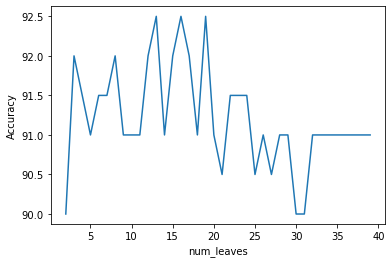

Max Accuracy is obtained at num_leaves : 13


In [124]:
from lightgbm import LGBMClassifier

min_dic = {}
for i in range(2, 40):
    lgbm_clf = LGBMClassifier(num_leaves=i)
    lgbm_clf.fit(x_train2, y_train2)

    min_dic[i] = lgbm_clf.score(x_test2, y_test2)*100

print("Num Leaves...")

x = list(min_dic.keys())
y = list(min_dic.values())
plt.ylabel("Accuracy")
plt.xlabel("num_leaves")

plt.plot(x, y)
plt.show()

print("Max Accuracy is obtained at num_leaves :", max(min_dic, key=min_dic.get))

### ***5. Analyze the relation between max_depth and num_leaves, and check for which value the model starts overfitting.***


Num Leaves...


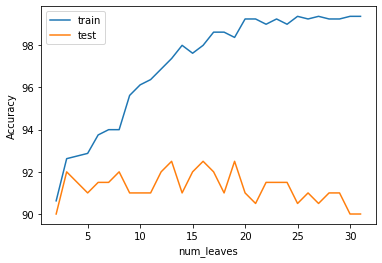

Max test accuracy is obtained at num leaves : 13


In [125]:
min_dic_test = {}
min_dic_train = {}

for i in range(2, 32):
    lgbm_clf = LGBMClassifier(num_leaves=i)
    lgbm_clf.fit(x_train2, y_train2)

    min_dic_train[i] = lgbm_clf.score(x_train2, y_train2)*100
    min_dic_test[i] = lgbm_clf.score(x_test2, y_test2)*100

print("Num Leaves...")

x_test_plot = list(min_dic_test.keys())
x_train_plot = list(min_dic_train.keys())
y_test_plot = list(min_dic_test.values())
y_train_plot = list(min_dic_train.values())
plt.ylabel("Accuracy")
plt.xlabel("num_leaves")

plt.plot(x_train_plot, y_train_plot, label='train')
plt.plot(x_test_plot, y_test_plot, label='test')

plt.legend()
plt.show()

print("Max test accuracy is obtained at num leaves :", max(min_dic_test, key=min_dic_test.get))

Max Depth...


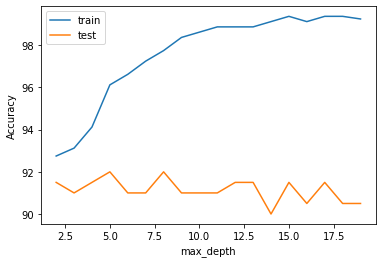

Max test accuracy is obtained at max depth : 5


In [126]:
min_dic_test = {}
min_dic_train = {}

for i in range(2, 20):
    lgbm_clf = LGBMClassifier(max_depth=i)
    lgbm_clf.fit(x_train2, y_train2)

    min_dic_train[i] = lgbm_clf.score(x_train2, y_train2)*100
    min_dic_test[i] = lgbm_clf.score(x_test2, y_test2)*100

print("Max Depth...")

x_test_plot = list(min_dic_test.keys())
x_train_plot = list(min_dic_train.keys())
y_test_plot = list(min_dic_test.values())
y_train_plot = list(min_dic_train.values())
plt.ylabel("Accuracy")
plt.xlabel("max_depth")

plt.plot(x_train_plot, y_train_plot, label='train')
plt.plot(x_test_plot, y_test_plot, label='test')

plt.legend()
plt.show()

print("Max test accuracy is obtained at max depth :", max(min_dic_test, key=min_dic_test.get))

...


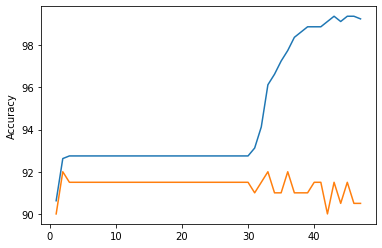

Optimal hyperparameters...
Num Leaves : 31
Max Depth : 19

Maximum accuracy obtained at above hyperparameters is : 93.0


In [127]:
min_dic_test = {}
min_dic_train = {}
max_a = 0

for i in range(2, 32):
    for j in range(2, 20):
        lgbm_clf = LGBMClassifier(num_leaves=i, max_depth=j)
        lgbm_clf.fit(x_train2, y_train2)

        min_dic_train[i+j-3] = lgbm_clf.score(x_train2, y_train2)*100
        min_dic_test[i+j-3] = lgbm_clf.score(x_test2, y_test2)*100

        if lgbm_clf.score(x_test2, y_test2)>max_a:
            max_a = lgbm_clf.score(x_test2, y_test2)
            max_septh = j
            num_leaves = i

print("...")

x_test_plot = list(min_dic_test.keys())
x_train_plot = list(min_dic_train.keys())
y_test_plot = list(min_dic_test.values())
y_train_plot = list(min_dic_train.values())
plt.ylabel("Accuracy")
# plt.xlabel("num_leaves")

plt.plot(x_train_plot, y_train_plot)
plt.plot(x_test_plot, y_test_plot)
plt.show()

print("Optimal hyperparameters...")
print("Num Leaves :", i)
print("Max Depth :", j)
print()

print("Maximum accuracy obtained at above hyperparameters is :", max_a*100)

In [128]:
lgbm_clf = LGBMClassifier(num_leaves=31, max_depth=19)
lgbm_clf.fit(x_train2, y_train2)

print("Accuracy of the tuned LightGBM model is :", lgbm_clf.score(x_test2, y_test2)*100)

Accuracy of the tuned LightGBM model is : 90.5


### ***6. Report which parameters can be used for better accuracy and also which parameter can be used for avoiding overfitting.***

### ***7. Plot the decision boundaries for all the 3 models and compare their performance.***

AdaBoost Classifier Decision Boundary...


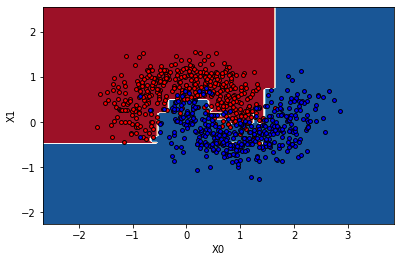

In [129]:
print("AdaBoost Classifier Decision Boundary...")

classes = [0, 1]

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    ada_clf,
    x_train2,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train2 == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

XG Boost Classifier Decision Boundary...


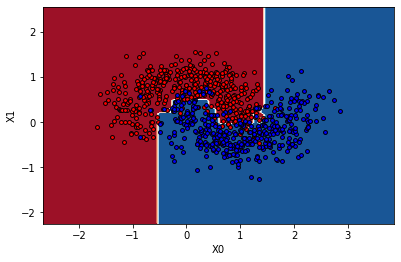

In [130]:
print("XG Boost Classifier Decision Boundary...")


classes = [0, 1]

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    xg_clf,
    x_train2,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train2 == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

LightGBM Classifier Decision Boundary...


NotFittedError: ignored

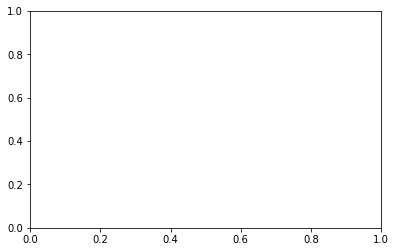

In [131]:
print("LightGBM Classifier Decision Boundary...")

classes = [0, 1]

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot()


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    lgbm_clf,
    x_train2,
    cmap=plt.cm.RdBu,
    response_method="predict",
    ax=ax,
    xlabel='X0',
    ylabel='X1')

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train2 == classes[i])
    plt.scatter(
        x_train[idx, 0],
        x_train[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

# ***QUESTION 3***


---
---



Train a Bayes classification model on the above dataset, (using sklearn)(tune the hyperparameters accordingly)

In [145]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train2, y_train2)

print("Accuracy of Gaussian Naive Bayes is :", gnb.score(x_test2, y_test2)*100, "%")

Accuracy of Gaussian Naive Bayes is : 86.5 %


From all the above trained models, choose any 3 models of your choice (which are giving good accuracy). Group them along with the trained Bayes Classification model, in a VotingClassifer from sklearn. Train the VotingClassfier again. And compare its performance with the models which were individually trained.

In [146]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('gnb', gnb), ('dtc', classifier), ('abc', ada_clf), ('rf', clf_rf)], voting='hard')
eclf1 = eclf1.fit(x_train2, y_train2)

In [147]:
print("Accuracy of Voting Classifier on test set is :", eclf1.score(x_test2, y_test2)*100, "%")

Accuracy of Voting Classifier on test set is : 90.5 %
